In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import seaborn as sns
from scipy import stats
import json
import ast
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA

# Data Import

In [3]:
# 1
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
# 2
url = '/content/drive/MyDrive/2. Relevant Projects/Market Research (Restaurant)/Dataset/RestaurantDB - RestaurantDB.csv'
df = pd.read_csv(url)

# 1. Data Exploration

In [5]:
df.tail(10)

,Position,Medium_Price,Type,Surroundings,working_Time,Daily_Revenue,Nb_customers_Daily,Stud_perc,Pub_Emp_perc,H_Work_perc,ROI_positive
47,Menzah,30,Medium,H_workers,Day_Eve,600,24,0.00,0.00,1,1
48,Menzah,20,FastFood,students_Workers,Day_Eve,640,30,0.55,0.45,0,1
49,Menzah,12,FastFood,students_Workers,Day_Eve,650,63,0.94,0.06,0,1
50,Menzah,35,Medium,H_workers,Day_Eve,700,26,0.00,0.00,1,1
51,Menzah,15,FastFood,public_employees,Day_Eve,700,80,0.00,1.00,0,1
52,Menzah,14,FastFood,students_Workers,Day_Eve,700,60,0.50,0.50,0,1
53,Menzah,12,FastFood,Students,Day_Eve,750,520,1.00,0.00,0,1
54,Menzah,30,Medium,students_Workers,Day_Eve,800,34,0.25,0.75,0,1
55,Menzah,35,Medium,H_workers,Day_Eve,800,19,0.00,0.00,1,1
56,Menzah,20,FastFood,students_Workers,Day_Eve,900,26,0.60,0.40,0,1


In [6]:
#df['Stud_perc']=df['Stud_perc'].astype(str)

In [7]:
df.describe()

,Medium_Price,Daily_Revenue,Nb_customers_Daily,Stud_perc,Pub_Emp_perc,H_Work_perc,ROI_positive
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,27.526316,551.403509,133.842105,0.371053,0.313158,0.315789,0.666667
std,17.351518,141.912179,185.352443,0.444637,0.423194,0.468961,0.475595
min,8.000000,300.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,450.000000,19.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,550.000000,29.000000,0.000000,0.000000,0.000000,1.000000
75%,35.000000,650.000000,280.000000,1.000000,0.750000,1.000000,1.000000
max,90.000000,900.000000,570.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Position            57 non-null     object 
 1   Medium_Price        57 non-null     int64  
 2   Type                57 non-null     object 
 3   Surroundings        57 non-null     object 
 4   working_Time        57 non-null     object 
 5   Daily_Revenue       57 non-null     int64  
 6   Nb_customers_Daily  57 non-null     int64  
 7   Stud_perc           57 non-null     float64
 8   Pub_Emp_perc        57 non-null     float64
 9   H_Work_perc         57 non-null     int64  
 10  ROI_positive        57 non-null     int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 5.0+ KB


In [9]:
df.shape

(57, 11)

In [10]:
df.isnull().sum()

Position              0
Medium_Price          0
Type                  0
Surroundings          0
working_Time          0
Daily_Revenue         0
Nb_customers_Daily    0
Stud_perc             0
Pub_Emp_perc          0
H_Work_perc           0
ROI_positive          0
dtype: int64

In [11]:
for col in df.columns :
  print(f'{col} : \n {df[col].value_counts()} \n ')

Position : 
 Menzah      18
Lac         10
CUN          9
Bardo        8
Mannouba     7
Manar        5
Name: Position, dtype: int64 
 
Medium_Price : 
 30    8
25    6
10    5
20    5
9     4
15    4
35    4
40    3
50    3
12    2
45    2
8     2
31    1
55    1
60    1
80    1
90    1
27    1
23    1
13    1
14    1
Name: Medium_Price, dtype: int64 
 
Type : 
 Medium      25
FastFood    23
High         9
Name: Type, dtype: int64 
 
Surroundings : 
 H_workers           18
Students            16
students_Workers    12
public_employees    11
Name: Surroundings, dtype: int64 
 
working_Time : 
 Day_Eve       48
Evening        7
Late_Night     2
Name: working_Time, dtype: int64 
 
Daily_Revenue : 
 600    10
500     7
650     7
400     5
700     4
550     4
300     4
375     2
800     2
750     2
350     2
450     2
475     2
770     1
640     1
470     1
900     1
Name: Daily_Revenue, dtype: int64 
 
Nb_customers_Daily : 
 300    3
24     3
10     2
27     2
19     2
7      2
14     2
30

# 2. Data Vizualisation

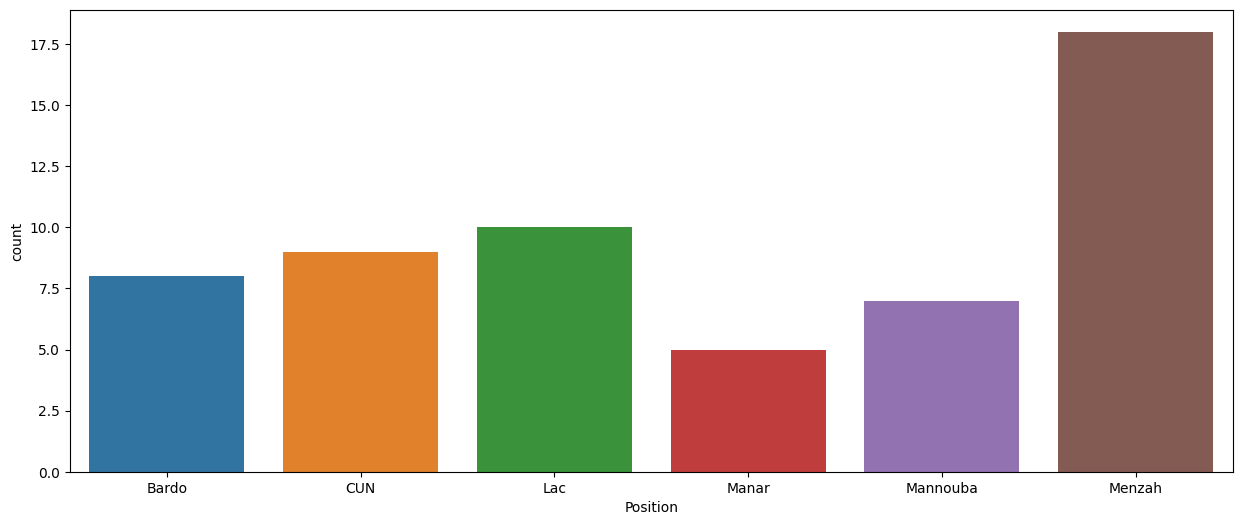

In [12]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='Position')
plt.show()

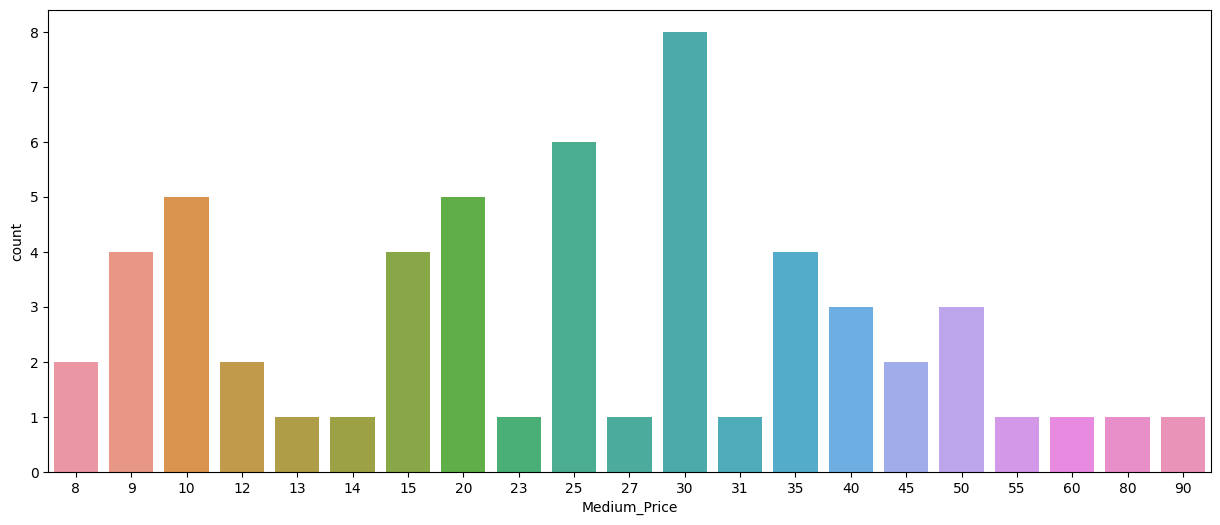

In [13]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='Medium_Price')
plt.show()

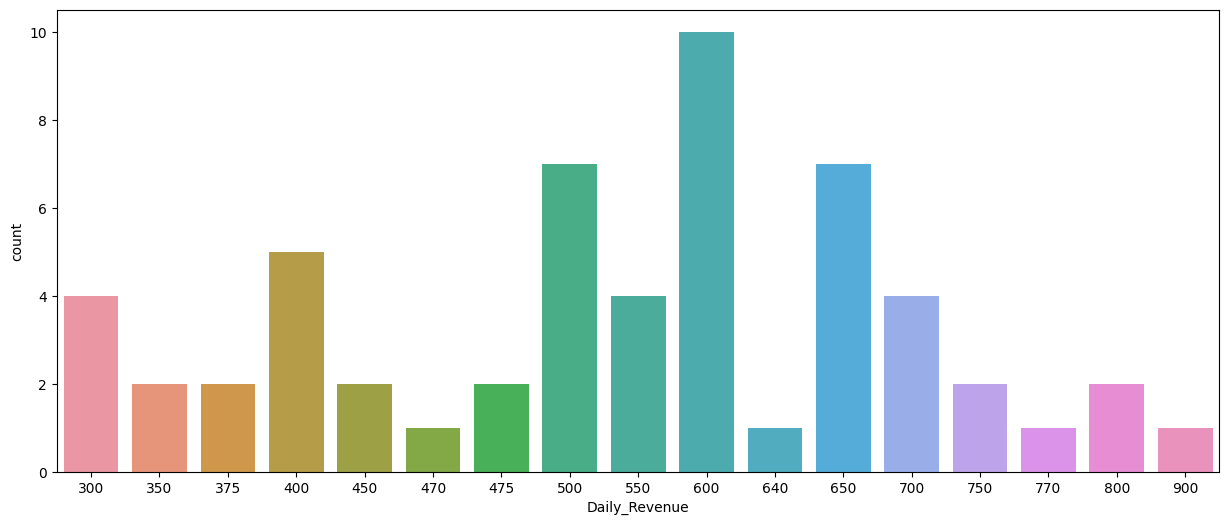

In [14]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='Daily_Revenue')
plt.show()

<Axes: xlabel='Position', ylabel='Daily_Revenue'>

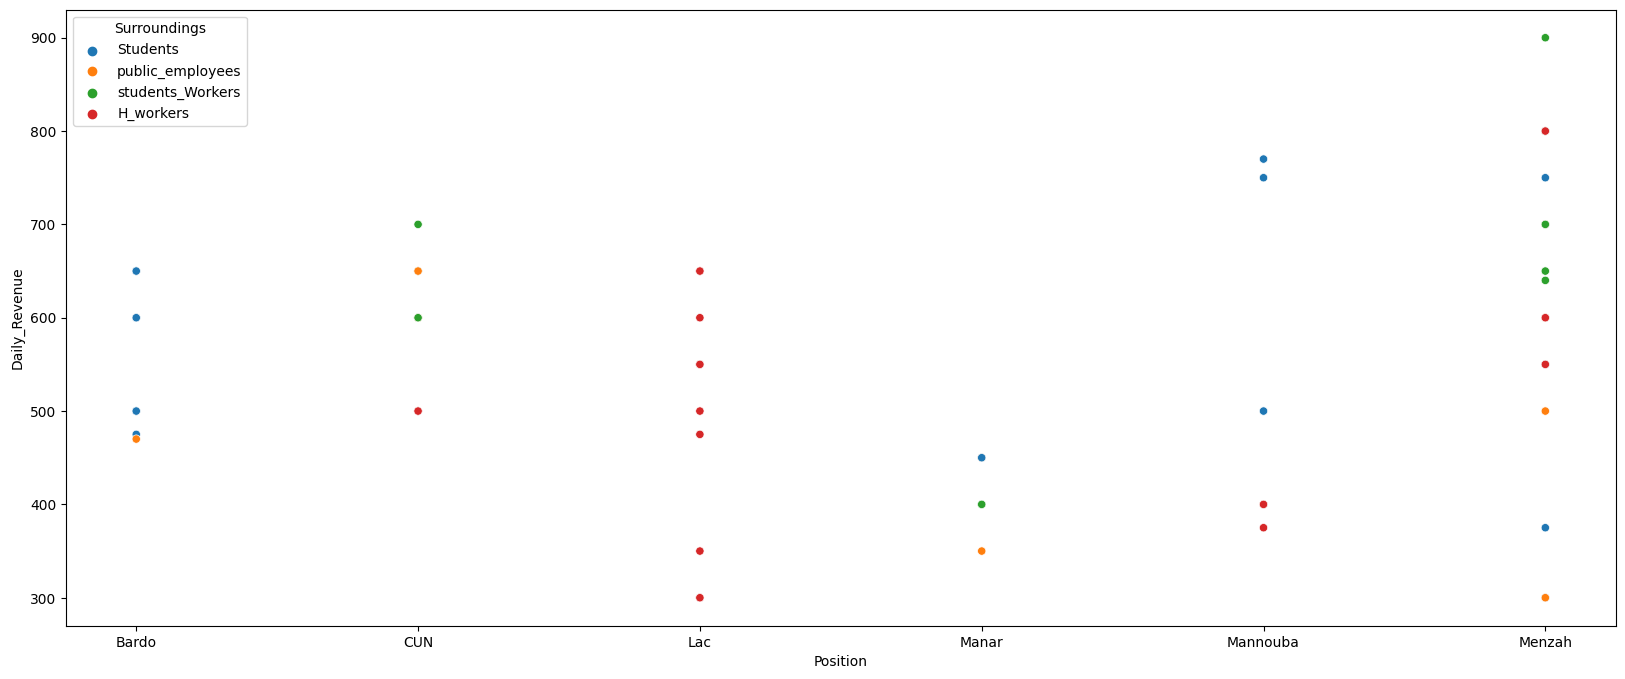

In [15]:
plt.figure(figsize=(20, 8))
sns.scatterplot(data = df , x="Position", y="Daily_Revenue", hue="Surroundings")

<ipython-input-16-d6ab123e2f22>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr('spearman'), ax=ax,  annot=True, linewidths=0.05, fmt= '.2f',cmap='RdBu') #kind of correlation->  ‘pearson’, ‘kendall’, ‘spearman’


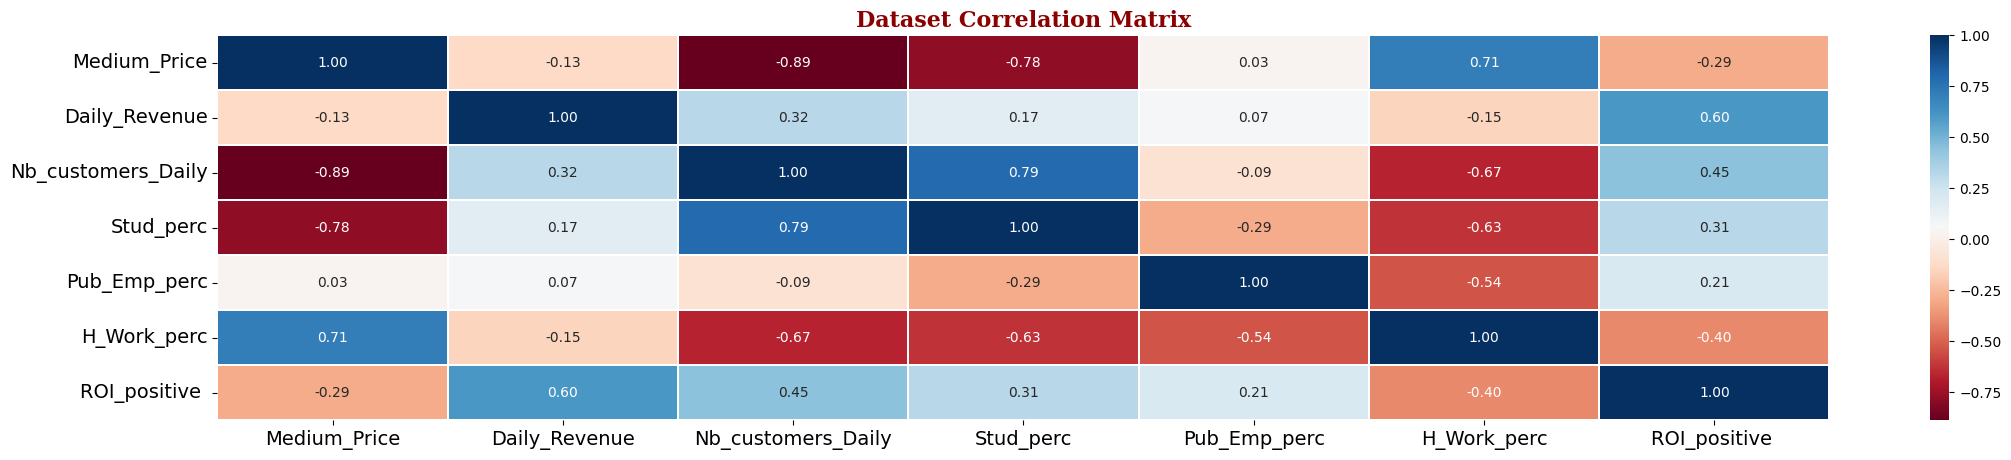

In [16]:
# plot correlation matrix heatmap
axtitle_dict = {'family': 'serif','color':  'darkred','weight': 'bold','size': 16}

fig, ax = plt.subplots(figsize=[26,5])
sns.heatmap(df.corr('spearman'), ax=ax,  annot=True, linewidths=0.05, fmt= '.2f',cmap='RdBu') #kind of correlation->  ‘pearson’, ‘kendall’, ‘spearman’
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title('Dataset Correlation Matrix', fontdict=axtitle_dict)
fig.show()

- The correlation graph suggests strong positive dependance between the pourcentage of the high income workers and and the medium price, whick makes sense, the higher the price the more likely is the customer segment going to be on the high income scale.
- Significantly negative correlation between number of customers daily and High income workers, which supports and goes inline with the previous observation.
- The highest negative correlation is between medium price and number of customer daily, which also makes sense, depending on the place of the restaurant. However an outlier in this case might indicate high quality service in the restaurant, specific characteristics of the servings, general ambiance in the restaurant, marketing strategies etc. They can be taken as a means to evaluate how to overperform regardless of the medium price offered.

- Positivive correlation between Return over Investement and Daily revenue values, but with a relatively medium correlation value : 0.6, which also makes sense since it also depends on the amount of investement, and the variations of the money flux depending on different stages of the lifetime of a restaurant, varying strategies, inflation etc.

import necessary

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import time

# 1st Classification using Kmeans

1. **Revenue relative to medium price**

In [18]:
plot=df.iloc[:,[1,5]].values
plot

array([[  9, 500],
       [ 10, 500],
       [ 13, 475],
       [ 25, 470],
       [  8, 600],
       [  8, 650],
       [  9, 650],
       [ 10, 600],
       [ 30, 600],
       [ 25, 600],
       [ 30, 650],
       [ 35, 700],
       [ 40, 500],
       [ 25, 600],
       [ 27, 600],
       [ 31, 650],
       [ 30, 500],
       [ 40, 475],
       [ 45, 550],
       [ 45, 650],
       [ 50, 650],
       [ 50, 300],
       [ 55, 550],
       [ 60, 600],
       [ 80, 500],
       [ 90, 350],
       [ 50, 300],
       [ 30, 400],
       [ 35, 450],
       [ 25, 350],
       [ 30, 400],
       [ 20, 450],
       [ 25, 375],
       [ 20, 400],
       [ 20, 400],
       [ 23, 400],
       [ 15, 500],
       [ 10, 750],
       [ 10, 770],
       [  9, 300],
       [ 25, 300],
       [  9, 375],
       [ 30, 500],
       [ 10, 550],
       [ 40, 550],
       [ 15, 600],
       [ 15, 600],
       [ 30, 600],
       [ 20, 640],
       [ 12, 650],
       [ 35, 700],
       [ 15, 700],
       [ 14,

Defining a function for finding wcss, plotting elbow graph and training according to a number of clusters that we can change after visualizing the elbow graph. (This function will be used multiple times when trying to visulize the classes according to only 2 specific features.)

In [19]:
def plot_Processing(plot,n_clusters):
  # finding wcss value for different number of clusters
  wcss= []

  for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init="k-means++",random_state=42)
    kmeans.fit(plot)

    wcss.append(kmeans.inertia_)
  print(wcss[0])

  # # plot an elbow graph

  sns.set()
  plt.plot(range(1,11),wcss)
  plt.title('The Elbow Point Graph')
  plt.xlabel('Number of Clusters')
  plt.ylabel('WCSS')
  plt.show()

  kmeans = KMeans(n_clusters=n_clusters,init="k-means++",random_state=0)

  # return a label for each data point based on their cluster
  y = kmeans.fit_predict(plot)

  print(y)

  return wcss,kmeans,y


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

1144647.9298245616


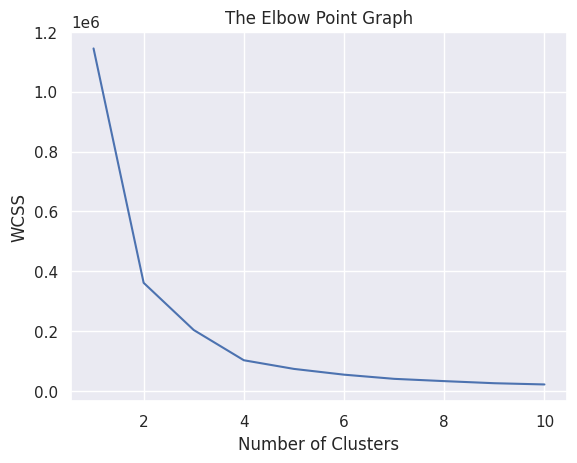

[0 0 0 0 0 2 2 0 0 0 2 2 0 0 0 2 0 0 0 2 2 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0
 2 2 1 1 1 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [20]:
wcss,kmeans,y= plot_Processing(plot,3)

Plotting clusters and centroids

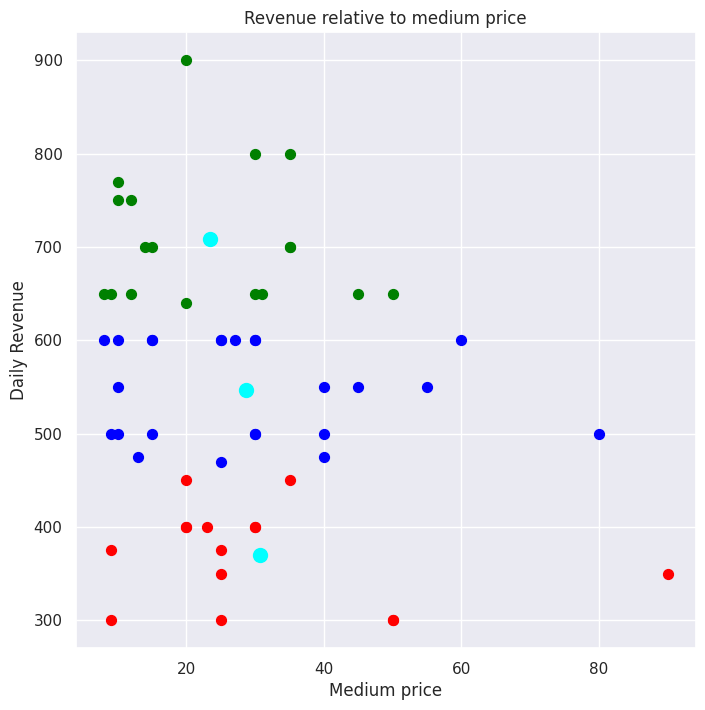

In [21]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))

plt.scatter(plot[y==0,0],plot[y==0,1], s=50, c='blue', label='cluster 1')
plt.scatter(plot[y==1,0],plot[y==1,1], s=50, c='Red', label='cluster 2')
plt.scatter(plot[y==2,0],plot[y==2,1], s=50, c='Green', label='cluster 3')

#plt.show()
# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=100, c='cyan', label='centroids')

plt.title('Revenue relative to medium price')
plt.xlabel('Medium price')
plt.ylabel('Daily Revenue')
plt.show()

**2. Number of customer relative to medium price**

In [22]:
plot_2=df.iloc[:,[1,6]].values
plot_2

array([[  9, 475],
       [ 10, 390],
       [ 13, 310],
       [ 25,  28],
       [  8, 570],
       [  8, 560],
       [  9, 500],
       [ 10, 525],
       [ 30,  20],
       [ 25,  25],
       [ 30,  27],
       [ 35,  33],
       [ 40,  10],
       [ 25,  31],
       [ 27,  40],
       [ 31,  35],
       [ 30,  21],
       [ 40,  15],
       [ 45,  25],
       [ 45,  24],
       [ 50,  14],
       [ 50,   7],
       [ 55,   8],
       [ 60,  11],
       [ 80,   5],
       [ 90,   7],
       [ 50,   9],
       [ 30,  24],
       [ 35,  29],
       [ 25,  19],
       [ 30,  10],
       [ 20, 300],
       [ 25,  27],
       [ 20, 150],
       [ 20,  30],
       [ 23,  28],
       [ 15, 300],
       [ 10, 400],
       [ 10, 550],
       [  9, 280],
       [ 25,  12],
       [  9, 300],
       [ 30,  14],
       [ 10, 400],
       [ 40,   9],
       [ 15,  55],
       [ 15,  85],
       [ 30,  24],
       [ 20,  30],
       [ 12,  63],
       [ 35,  26],
       [ 15,  80],
       [ 14,

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

1940769.7894736843


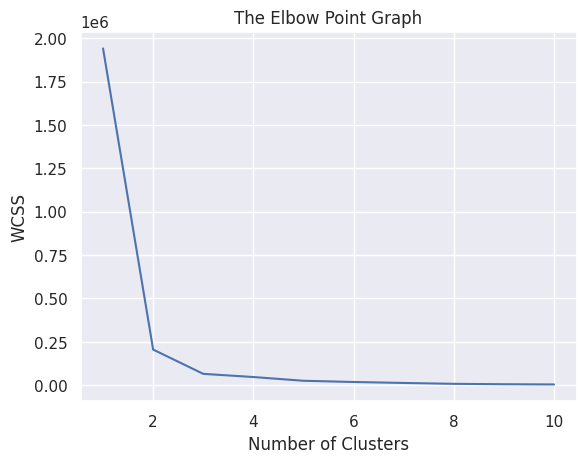

[1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [23]:
wcss,kmeans,y = plot_Processing(plot_2,2)

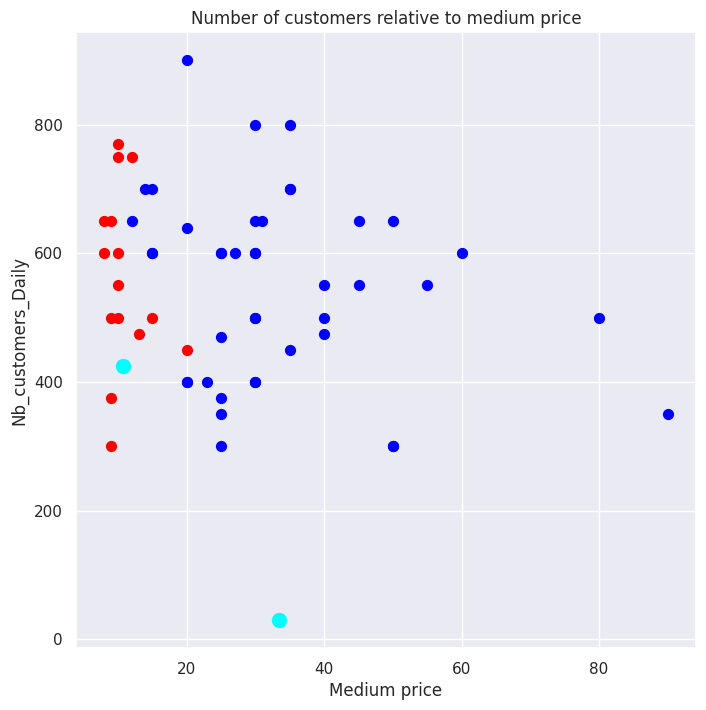

In [24]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))

plt.scatter(plot[y==0,0],plot[y==0,1], s=50, c='blue', label='cluster 1')
plt.scatter(plot[y==1,0],plot[y==1,1], s=50, c='Red', label='cluster 2')

#plt.show()
# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=100, c='cyan', label='centroids')

plt.title('Number of customers relative to medium price')
plt.xlabel('Medium price')
plt.ylabel('Nb_customers_Daily')
plt.show()

Clustering taking into account all numeric values

In [25]:
X, _ = make_blobs(n_samples=57, centers=3, n_features=7)

df1 = pd.DataFrame(X, columns=['Medium_Price','Daily_Revenue','Nb_customers_Daily','Stud_perc','Pub_Emp_perc','H_Work_perc','ROI_positive'])

kmeans_all = KMeans(n_clusters=3)

y_all = kmeans_all.fit_predict(df1[['Medium_Price','Daily_Revenue','Nb_customers_Daily','Stud_perc','Pub_Emp_perc','H_Work_perc','ROI_positive']])
print(y_all)
df1['Cluster'] = y_all

print(df1.head())

[2 2 0 1 2 2 0 0 2 2 0 0 0 1 0 2 1 2 0 2 0 1 0 2 1 2 2 2 1 1 1 1 0 1 1 0 2
 0 0 0 0 2 0 2 2 1 1 1 2 2 1 1 0 1 1 0 1]
   Medium_Price  Daily_Revenue  Nb_customers_Daily  Stud_perc  Pub_Emp_perc  \
0     -5.354865      -4.830681           -0.591308  -0.278867      5.306681   
1     -4.631974      -3.796156           -1.521058  -0.380670      2.963303   
2     -5.458032      -3.948557            3.067830  -6.872542     -6.238782   
3      3.810367      -7.589508            7.627444   5.150358      6.464352   
4     -4.004272      -4.025679           -1.857852  -1.021684      6.982432   

   H_Work_perc  ROI_positive  Cluster  
0     8.032095      1.553487        2  
1     8.178549     -0.564472        2  
2     2.692100     -6.020691        0  
3     1.812914     -6.708147        1  
4     9.588932     -0.386993        2  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


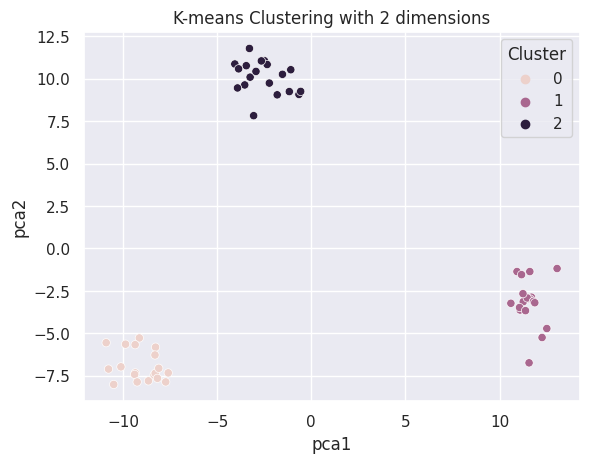

In [26]:
### Running PCA on the data and reduce the dimensions in pca_num_components dimensions

pca_num_components = 2

pca = PCA(n_components=pca_num_components)
reduced_data = pca.fit_transform(df1)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=df1['Cluster'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

,Medium_Price,Daily_Revenue,Nb_customers_Daily,Stud_perc,Pub_Emp_perc,H_Work_perc,ROI_positive,Cluster,pca1,pca2
0,-5.354865,-4.830681,-0.591308,-0.278867,5.306681,8.032095,1.553487,2,-2.227649,9.744371
1,-4.631974,-3.796156,-1.521058,-0.380670,2.963303,8.178549,-0.564472,2,-3.060820,7.825050
2,-5.458032,-3.948557,3.067830,-6.872542,-6.238782,2.692100,-6.020691,0,-9.129275,-5.271545
3,3.810367,-7.589508,7.627444,5.150358,6.464352,1.812914,-6.708147,1,10.921160,-1.358867
4,-4.004272,-4.025679,-1.857852,-1.021684,6.982432,9.588932,-0.386993,2,-1.088973,10.532976


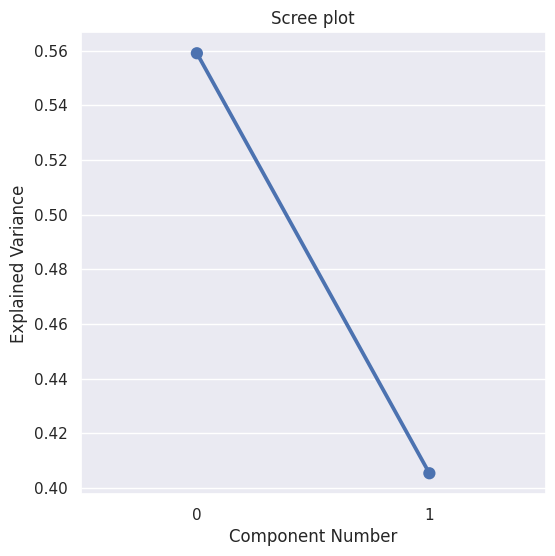

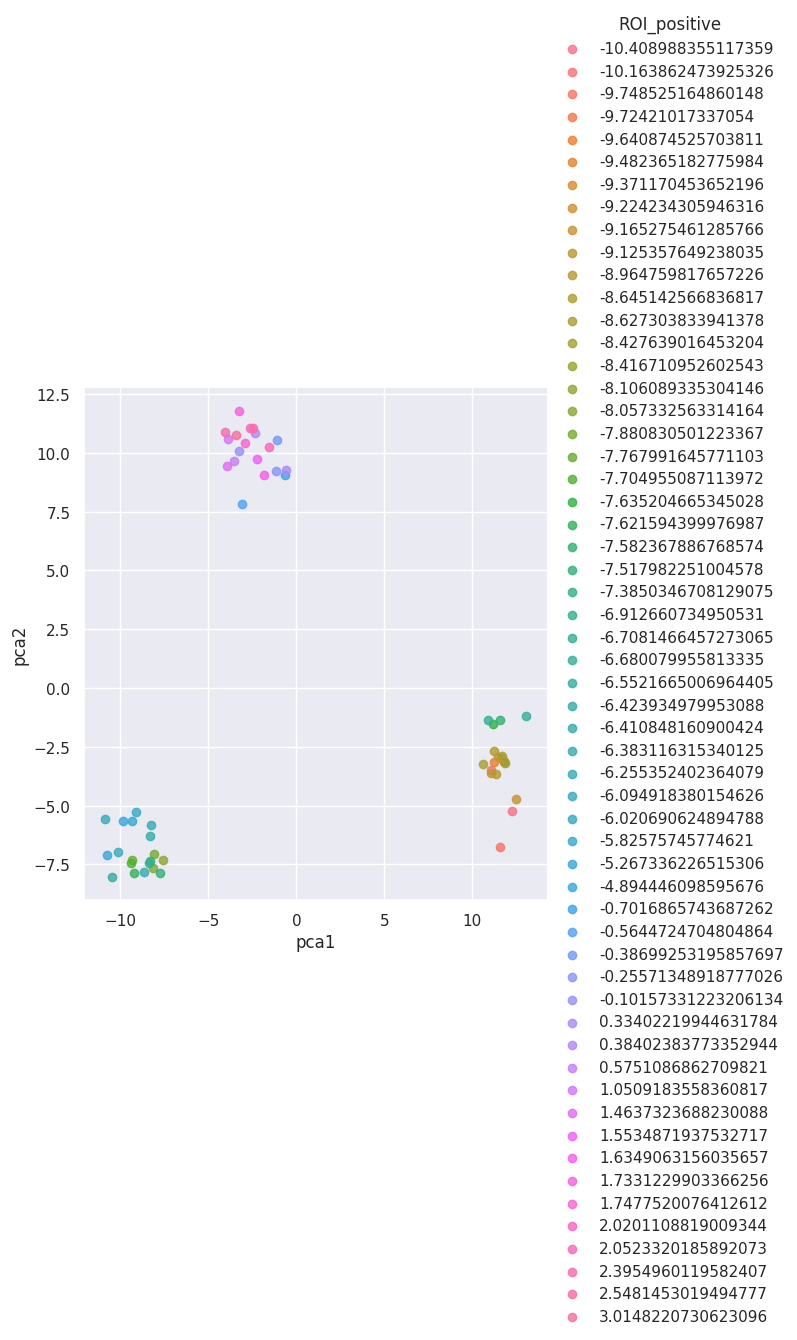

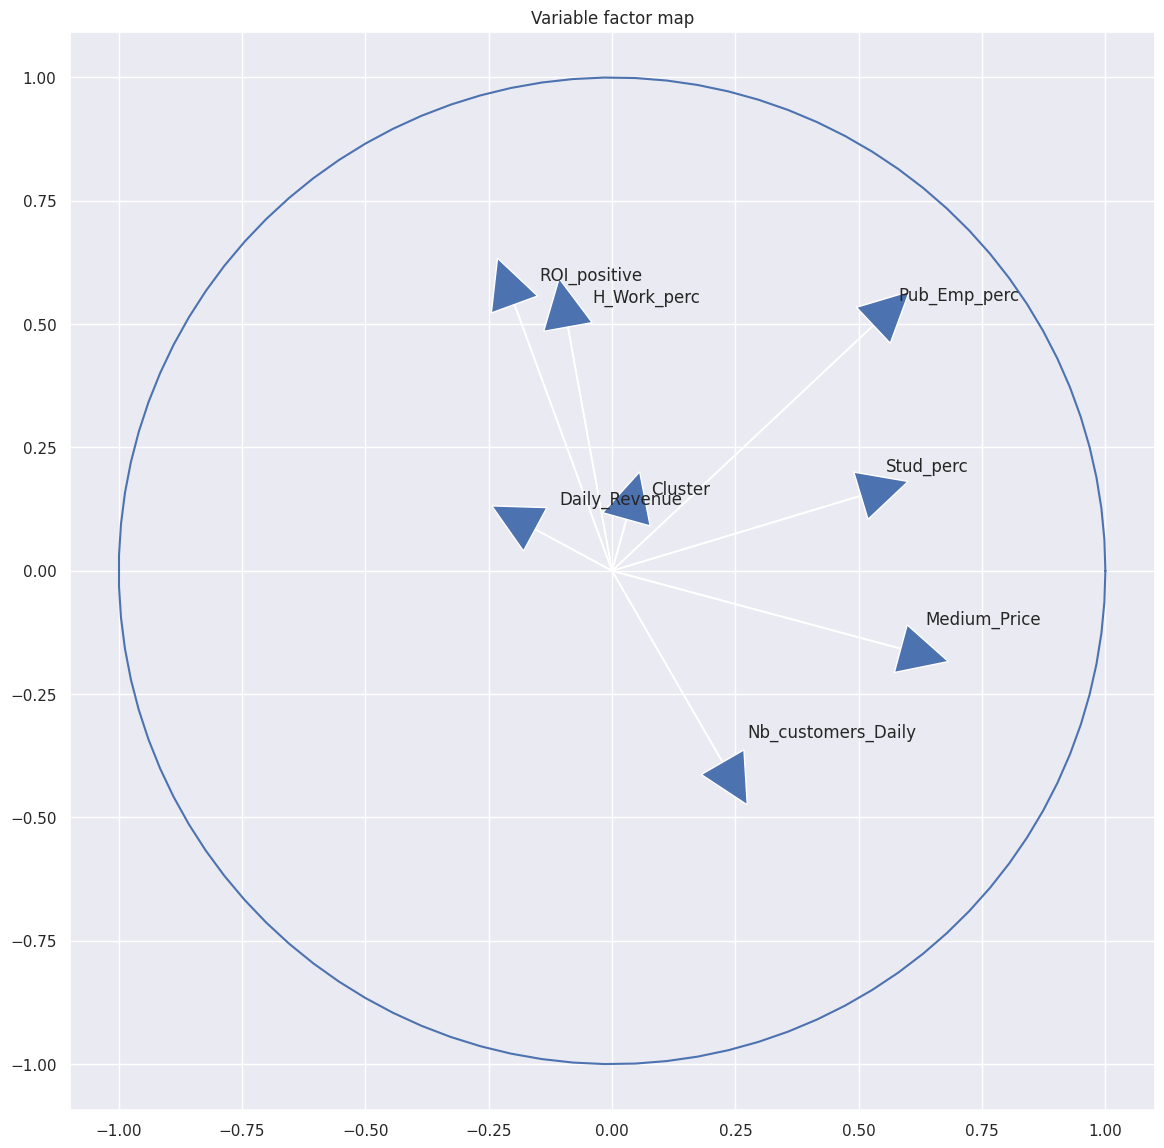

In [32]:
# Append the principle components for each entry to the dataframe
for i in range(0, pca_num_components):
    df1['pca' + str(i + 1)] = reduced_data[:, i]

display(df1.head())

# Do a scree plot
ind = np.arange(0, pca_num_components)
(fig, ax) = plt.subplots(figsize=(6, 6))
sns.pointplot(x=ind, y=pca.explained_variance_ratio_)
ax.set_title('Scree plot')
ax.set_xticks(ind)
ax.set_xticklabels(ind)
ax.set_xlabel('Component Number')
ax.set_ylabel('Explained Variance')
plt.show()

# Show the points in terms of the first two PCs
g = sns.lmplot(x='pca1',
               y='pca2',
               hue='ROI_positive',data=df1,
               fit_reg=False,
               scatter=True,
               height=6)

plt.show()

# Plot a variable factor map for the first two dimensions.
(fig, ax) = plt.subplots(figsize=(14, 14))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.1,
             head_length=0.1)

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             df1.columns.values[i])


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
ax.set_title('Variable factor map')
plt.show()